Creating .npy file of Bangla Lekha Isolated 

In [1]:
import os
import cv2
import numpy as np
import dask
import dask.array as da
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Define the directory path containing sub-folders of images
direc_path = r'/home/sysadm/z/ML_P1/BanglaLekha-Isolated/Images'


Reading the whole Bangla lekha dataset in numpy and then saving it in .npy format.

Do not run unnecessarily access the whole Bangla npy file using np.load()

Bangla lekha npy file is saved in:'/home/sysadm/z/ML_P1/Data_npy_files/bangla_lekha_data.npy'

In [6]:
# Function to load and preprocess an image
def load_and_preprocess_image(sub_folder, img_name):
    img_path = os.path.join(direc_path, sub_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    img = cv2.resize(img, (28, 28))  # Resize image to a uniform size (e.g., 28x28)
    img = img.flatten() / 255.0  # Flatten pixel values and normalize to range [0, 1]
    label = int(sub_folder)  # Get the label from the sub-folder name
    return img, label

# Function to process images in a sub-folder
def process_sub_folder(sub_folder):
    sub_path = os.path.join(direc_path, sub_folder)
    images = []
    labels = []

    # Loop through each image in the sub-folder
    for img_name in os.listdir(sub_path):
        img, label = load_and_preprocess_image(sub_folder, img_name)
        images.append(img)
        labels.append(label)  # Store label for the image
        
    return images, labels

# List sub-folders (classes)
sub_folders = os.listdir(direc_path)

# Sort sub-folders numerically
sub_folders.sort(key=lambda x: int(x))

# Create Dask delayed objects for image processing
delayed_results = [dask.delayed(process_sub_folder)(sub_folder) for sub_folder in sub_folders]

# Compute delayed objects in parallel
results = dask.compute(*delayed_results)


In [7]:

# Flatten the list of lists of images and labels
images_flat = [img for sublist in results for img in sublist[0]]
labels_flat = [label for sublist in results for label in sublist[1]]

# Convert lists to NumPy arrays
images_array = np.array(images_flat)
labels_array = np.array(labels_flat)

# Save NumPy arrays to disk
#np.save('images.npy', images_array)
#np.save('labels.npy', labels_array)


#Merging te images and labels.
whole_data=np.hstack([images_array,labels_array.reshape((labels_array.shape[0],1))])
whole_data[:,-1]

#Saving the whole Ekush dataset in .npy format
np.save('/home/sysadm/z/ML_P1/Clean_bangla_npy/clean_bangla_lekha_data.npy', whole_data)

In [8]:
whole_data.shape
#whole_data[:,-1]

(86458, 785)

In [4]:
banglalekha_data_path_np='/home/sysadm/z/ML_P1/Data_npy_files/bangla_lekha_data.npy'
bangla_lekha=np.load(banglalekha_data_path_np)
bangla_lekha[:,-1]

array([ 1.,  1.,  1., ..., 50., 50., 50.])

In [5]:
bangla_lekha.shape

(98950, 785)

In [10]:
bangla_lekha[1,:784].reshape((28,28)).astype('float16')

array([[0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
   

Primary data npy files

In [2]:
# Define the directory path containing sub-folders of images
direc_path = r'/home/sysadm/z/ML_P1/primary_data/fabricated_data'


In [3]:
# Function to load and preprocess an image
def load_and_preprocess_image(sub_folder, img_name):
    img_path = os.path.join(direc_path, sub_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)  # Read image in original form
    img = cv2.resize(img, (28, 28))  # Resize image to a uniform size (e.g., 28x28)
    img = img.flatten() / 255.0  # Flatten pixel values and normalize to range [0, 1]
    label = int(sub_folder)  # Get the label from the sub-folder name
    return img, label

# Function to process images in a sub-folder
def process_sub_folder(sub_folder):
    sub_path = os.path.join(direc_path, sub_folder)
    images = []
    labels = []

    # Loop through each image in the sub-folder
    for img_name in os.listdir(sub_path):
        img, label = load_and_preprocess_image(sub_folder, img_name)
        images.append(img)
        labels.append(label)  # Store label for the image
        
    return images, labels

# List sub-folders (classes)
sub_folders = os.listdir(direc_path)

# Sort sub-folders numerically
sub_folders.sort(key=lambda x: int(x))

# Create Dask delayed objects for image processing
delayed_results = [dask.delayed(process_sub_folder)(sub_folder) for sub_folder in sub_folders]

# Compute delayed objects in parallel
results = dask.compute(*delayed_results)


In [4]:

# Flatten the list of lists of images and labels
images_flat = [img for sublist in results for img in sublist[0]]
labels_flat = [label for sublist in results for label in sublist[1]]

# Convert lists to NumPy arrays
images_array = np.array(images_flat)
labels_array = np.array(labels_flat)

# Save NumPy arrays to disk
#np.save('images.npy', images_array)
#np.save('labels.npy', labels_array)


#Merging te images and labels.
whole_primary_data=np.hstack([images_array,labels_array.reshape((labels_array.shape[0],1))])
whole_primary_data[:,-1]

#Saving the whole Ekush dataset in .npy format
np.save('/home/sysadm/z/ML_P1/Data_npy_files/primary_data(fab).npy', whole_primary_data)

In [5]:
whole_primary_data.shape

(2500, 785)

In [6]:
x=whole_primary_data[1,:784].reshape((28,28))
x

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

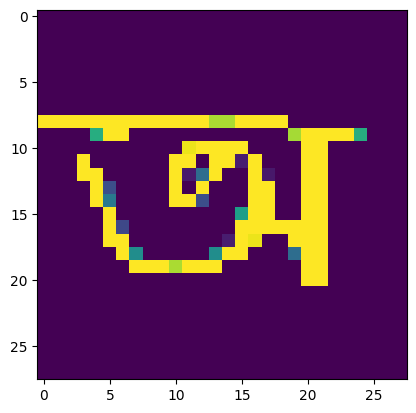

In [7]:
plt.imshow(x)